# Домашнее задание "Продвинутая линейная алгебра".

In [20]:
import numpy as np
import matplotlib.pyplot as plt


### Уровень 0:
Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [28]:
# С фантазией у меня плохо, поэтому решил все сделать в цикле

uno_matrix = np.array([[1, 0, 0],
                       [0, 1, 0],
                       [0, 0, 1]])

while True:
    some_matrix = np.diag(np.random.randint(-9, 9, 3))
    some_matrix_T = some_matrix.transpose()
    ver_matrix = some_matrix.dot(some_matrix_T)
    if np.array_equal(ver_matrix, uno_matrix) and np.array_equal(some_matrix, uno_matrix) != 3: # Проверка на ортогональность и что сгенерирована не единичная матрица
        break

print('Диагональная, ортогональная, но не единичная')
print(some_matrix)


Диагональная, ортогональная, но не единичная
[[ 1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [ ]:
# Здесь тоже не получилось придумать, чтобы была одновременно и верхнетреугольная и ортогональная
# Попробовал сгенерировать в цикле - то тоже не получается цикл виснет и не выходит

uno_matrix = np.array([[1, 0],
                       [0, 1]])

while True:
    some_matrix = np.array([np.random.randint(1, 9, 2),
                            np.random.randint(-9, 9, 2)])
    some_matrix = np.triu(some_matrix)
    some_matrix_T = some_matrix.transpose()
    ver_matrix = some_matrix.dot(some_matrix_T)
    if np.array_equal(ver_matrix, uno_matrix):
        break

print('Верхнетреугольная, ортогональная матрица')
print(some_matrix)

In [ ]:
# Здесь тоже не получилось придумать, чтобы была одновременно и нижнетреугольная и ортогональная
# Попробовал сгенерировать в цикле - то тоже не получается цикл виснет и не выходит

uno_matrix = np.array([[1, 0, 0],
                       [0, 1, 0],
                       [0, 0, 1]])

while True:
    some_matrix = np.array([np.random.randint(1, 99, 3),
                            np.random.randint(1, 99, 3),
                            np.random.randint(1, 99, 3)])
    some_matrix = np.tril(some_matrix)
    some_matrix_T = some_matrix.transpose()
    ver_matrix = some_matrix.dot(some_matrix_T)
    if np.array_equal(ver_matrix, uno_matrix):
        break

print('Нижнетреугольная, ортогональная матрица')
print(some_matrix)

In [29]:
# Опять же, решил сгенерировать матрицу и проверить на необходимые условия - нашлась

zero_matrix = np.array([[0, 0, 0],
                       [0, 0, 0],
                       [0, 0, 0]])

while True:
    some_matrix = np.array([np.random.randint(-9, 9, 3),
                            np.random.randint(-9, 9, 3),
                            np.random.randint(-9, 9, 3)])

    if some_matrix.any() != zero_matrix.any() and np.linalg.det(some_matrix) == 1:
        break

print('Матрица, у которой определитель = 1, и все элементы не равны 0')
print(some_matrix)

Матрица, у которой определитель = 1, и все элементы не равны 0
[[-1 -1 -2]
 [-1  1  1]
 [ 2 -3 -4]]


Найдите собственные значения и собственные вектора матриц:

m = np.array([[2, 2],
              [1, 3]])\
print(m)

In [41]:
m = np.array([[2, 2], 
              [1, 3]])

w, v = np.linalg.eig(m)
print('Собственные значения:\n', w)
print('Собственные вектора:\n', v)

Собственные значения:
 [1. 4.]
Собственные вектора:
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


### Уровень 1:

Найдите спектральное разложение матрицы:

m = np.array([[1, 2],
              [2,3]])\
print(m)

In [35]:
# Если я правильно понял, то спектарльное разложение матрицы A это произвдение марицы:
# V с собственными векторами
# L - диагональная матрица с собственными значениями
# обратной матрицы V

m = np.array([[1, 2], 
              [2,3]])

w, v = np.linalg.eig(m) # Находим собственные значения и вектора
v_T = np.linalg.inv(v) # получается обратную матрицу матрице собственных векторов
L = np.diag(w) # Диагональная матрица с собственными значениями
print(v)
print(L)
print(v_T)

print('Проверка:\n', v @ L @ v_T)

[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]
[[-0.23606798  0.        ]
 [ 0.          4.23606798]]
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]
Проверка:
 [[1. 2.]
 [2. 3.]]


Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

In [36]:
# Подгружаем датасет и необходимые классы и методы

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

digits = load_digits()
print(digits.data.shape)


(1797, 64)


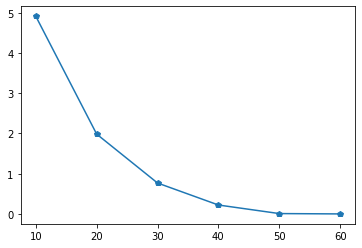

In [18]:
# Решил сделать так: в цикле перебрать компоненты (до которых будем уменьшать размерность) начиная с 60 до 10 с шагом 10
# На каждому шагу уменьшаю размерность до нужного количества компонент, восстанавливаю обратно и замерсяю ошибку
# Все пишу в соответствующие списки
# И потом строю график
# Получается чем меньше компонент мы указываем - тем больше и ошибка. Что собственно и логично.

components = []
errors = []

for component in range(60, 9, -10):
    pca = PCA(n_components = component)
    XPCAreduced = pca.fit_transform(digits.data)
    
    Xrecover = pca.inverse_transform(XPCAreduced)
    
    error = mean_squared_error(digits.data, Xrecover)
    
    components.append(component)
    errors.append(error)
    
plt.figure()
plt.plot(components, errors, marker='p')
plt.show()